# Daugman Algorithm demo

## Imports & prerequisites

In [1]:
import os
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from utils import *

In [2]:
base_dirs = {
        "images": "data/images",
        "extracted_irises": "",
        "irises": "data/irises",
        "pupils": "data/pupils",
    }

extracted_irises_dir = base_dirs["extracted_irises"]

## Sample image loaded

(470, 1410)

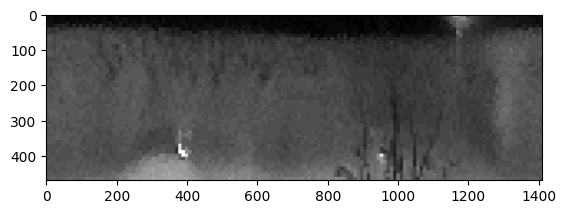

In [3]:
sample_image = imread("data/extracted_irises/left/38-1.png")[:, :, 0]
plt.imshow(sample_image, cmap="gray")
sample_image.shape

### Split into 8 rows

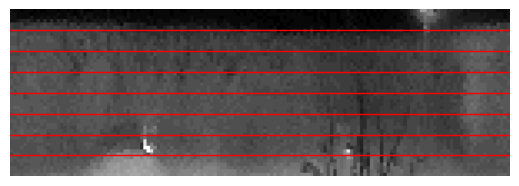

In [4]:
plt.figure(figsize=(5, 15))
plt.imshow(sample_image, cmap="gray")

height, width = sample_image.shape[:2]
row_height = height / 8

for i in range(1, 8):
    y_position = i * row_height
    plt.axhline(y=y_position, color='r', linestyle='-', linewidth=1)

plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### bands

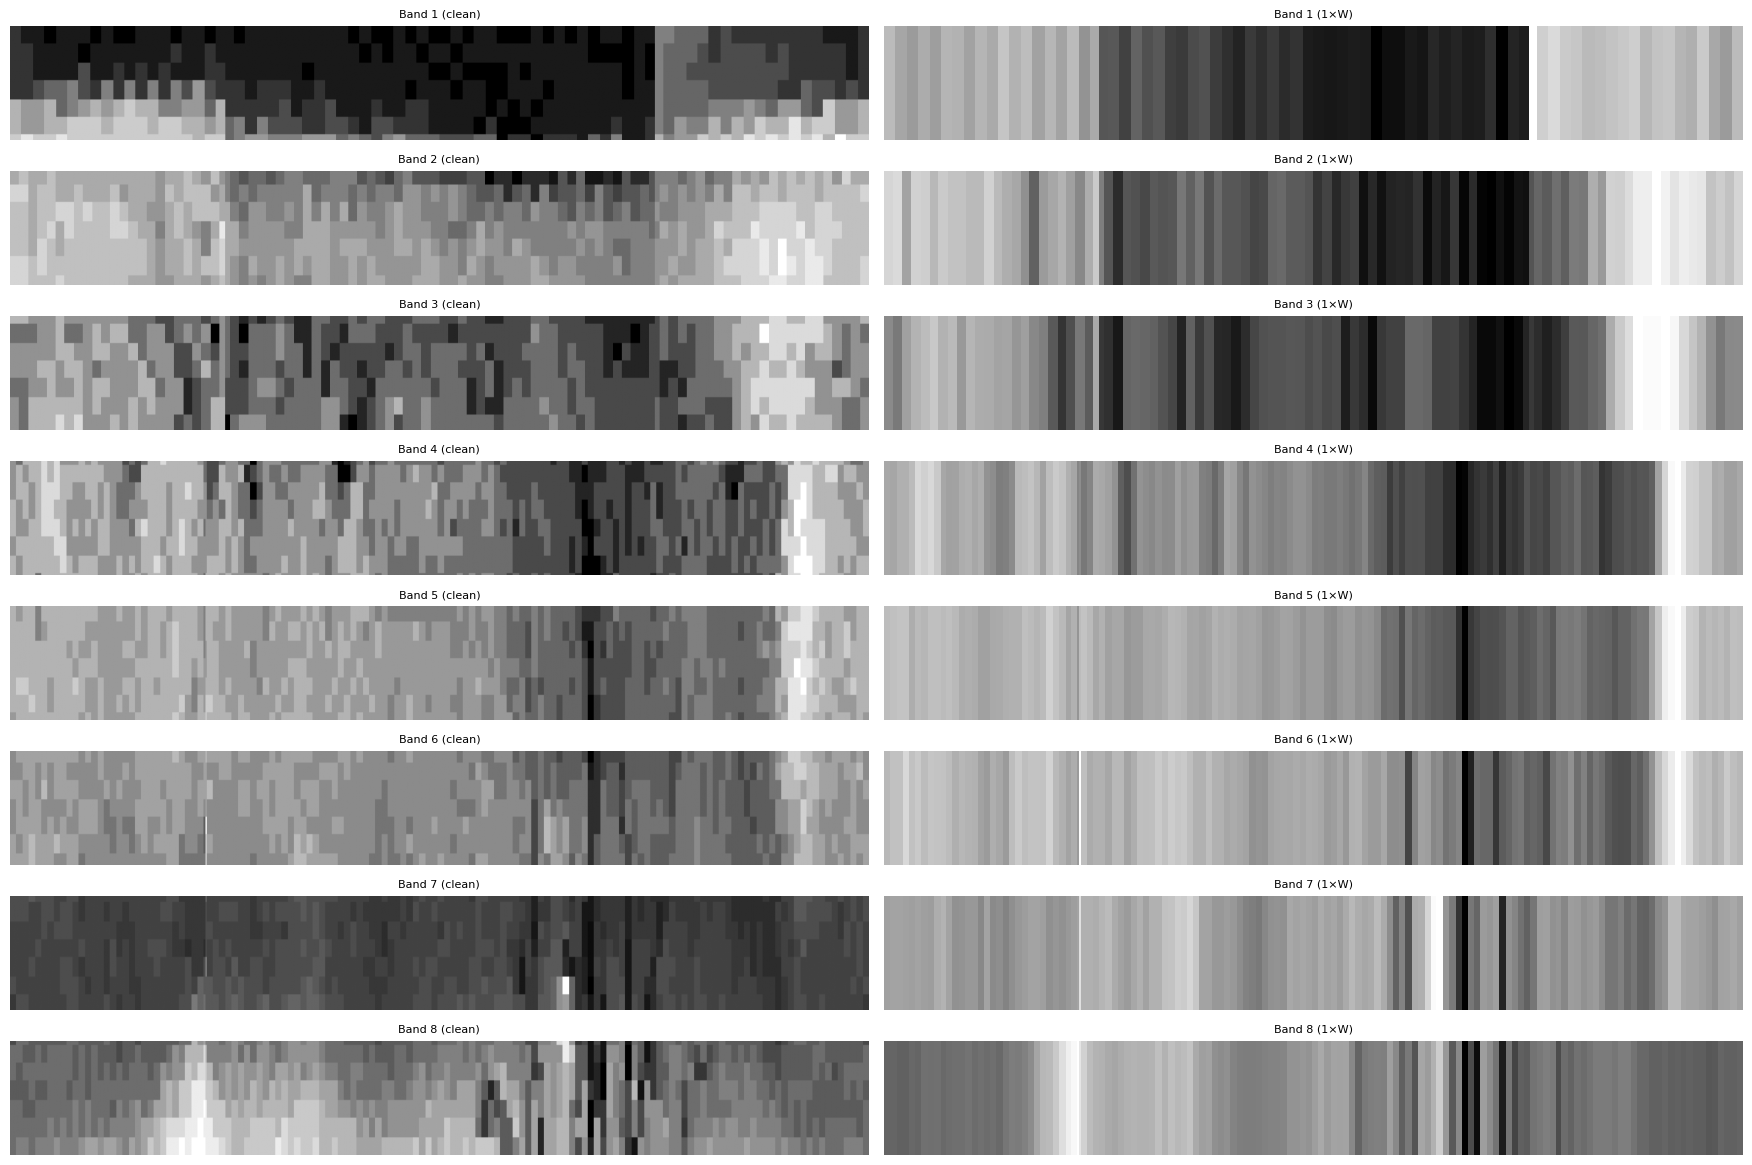

In [6]:
rows_list, collapsed = plot_8bands_with_collapse(sample_image, full_mask)

### Gabor decomposition

In [9]:
coeffs_per_band = []
bits_per_band   = []

for band_idx, row in enumerate(rows_list):
    coeffs, bits = gabor_decompose_row(row, num_coeffs=16)
    coeffs_per_band.append(coeffs)
    bits_per_band.append(bits)

print(bits_per_band[0])

['11', '00', '10', '01', '10', '01', '10', '01', '10', '00', '10', '00', '11', '00', '10', '01']


(16, 128)


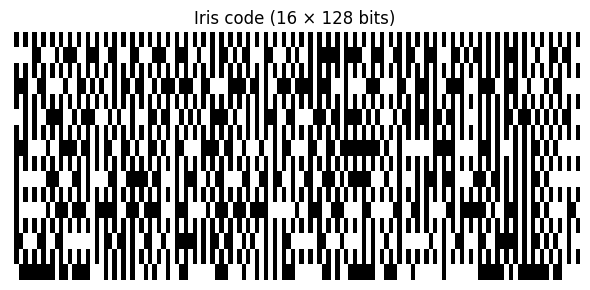

In [10]:
iris_code = build_iris_code(rows_list, num_coeffs=128)
print(iris_code.shape)
plot_iris_code(iris_code)